<a href="https://colab.research.google.com/github/mfavaits/YouTube-Series-on-Machine-Learning/blob/master/IMDB_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The IMDB dataset actually comes packaged with keras and its allready tokenized, menaing the text is allready converted in a sequence of unique word indices. The IMDB dataset contains 50,000 movie reviews (25,000 for training and 25,000 for testing). Each set contains of 50% positive and 50% negative reviews (12,500 x 2). 

In [0]:
import numpy as np
from keras.datasets import imdb
import matplotlib.pyplot as plt

In [0]:
vocabulary=7500 # we will only use the 7500 most frequently used words

Next code block is to fix a bug in keras. If bug would not exist this block would be just 1 line of code: (train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocabulary)

I suggest to just copy the fix and it does not really matter if you understand it or not



In [0]:
# save np.load
np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

# call load_data with allow_pickle implicitly set to true
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=vocabulary)

# restore np.load for future normal usage
np.load = np_load_old

In the next line of code we will print the lists that contain sequences of words represented by a word index. If the text has not been converted to a sequence of indices we would need to add one pre-processing step using Tokenizer

In [6]:
print(train_data[1]) # train_data is a list of word sequences

[1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4369, 5012, 134, 26, 4, 715, 8, 118, 1634, 14, 394, 20, 13, 119, 954, 189, 102, 5, 207, 110, 3103, 21, 14, 69, 188, 8, 30, 23, 7, 4, 249, 126, 93, 4, 114, 9, 2300, 1523, 5, 647, 4, 116, 9, 35, 2, 4, 229, 9, 340, 1322, 4, 118, 9, 4, 130, 4901, 19, 4, 1002, 5, 89, 29, 952, 46, 37, 4, 455, 9, 45, 43, 38, 1543, 1905, 398, 4, 1649, 26, 6853, 5, 163, 11, 3215, 2, 4, 1153, 9, 194, 775, 7, 2, 2, 349, 2637, 148, 605, 2, 2, 15, 123, 125, 68, 2, 6853, 15, 349, 165, 4362, 98, 5, 4, 228, 9, 43, 2, 1157, 15, 299, 120, 5, 120, 174, 11, 220, 175, 136, 50, 9, 4373, 228, 2, 5, 2, 656, 245, 2350, 5, 4, 2, 131, 152, 491, 18, 2, 32, 7464, 1212, 14, 9, 6, 371, 78, 22, 625, 64, 1382, 9, 8, 168, 145, 23, 4, 1690, 15, 16, 4, 1355, 5, 28, 6, 52, 154, 462, 33, 89, 78, 285, 16, 145, 95]


Now we will vectorize the training and test data. Basically we will create a matrix where the rows are the reviews and where the columns represent the vocabulary (7500 columns). We will set a 1 in the correct column if the word of the review matches a word of the vocabulary. This means that matrix will be rather sparse.

In [0]:
def vectorize_sequences(sequences, dimension=vocabulary):
    results=np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence]=1
    return results

In [0]:
x_train=vectorize_sequences(train_data)
x_test=vectorize_sequences(test_data)

Now we will vectorize the labels

In [0]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

Now we are ready to apply Naive Bayes. For this example (discreet) we will use the Multinomial NB algorithm

In [0]:
from sklearn.naive_bayes import MultinomialNB # smoothing is automatically applied
model=MultinomialNB()

In [36]:
model.fit(x_train, train_labels)
score=model.score(x_test, test_labels)
print("Accuracy:", score)

Accuracy: 0.8424


Let us take a look at other KPIs by copying some of the code of the KNN exercise on the Pima Indians

In [37]:
from sklearn.metrics import confusion_matrix
y_pred=model.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[10914,  1586],
       [ 2354, 10146]])

We note that we have 2354 false negatives and 1586 false positives. Recall in our case is TP/(TP+FN) = 81%. Precission is TP/(TP+FP)=86%

In [0]:
from sklearn.metrics import roc_curve
y_pred_proba=model.predict_proba(x_test)[:,1]
fpr, tpr, thresholds=roc_curve(y_test, y_pred_proba)

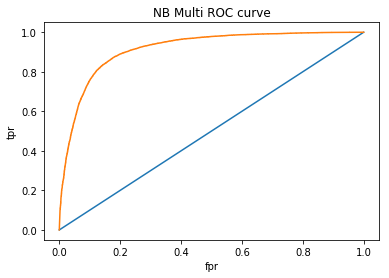

In [39]:
plt.plot([0,1], [0,1], '')
plt.plot(fpr, tpr, label='')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('NB Multi ROC curve')
plt.show()

We actually see a nice result for this classifier and this is reflected in the high AUC score

In [40]:
from sklearn.metrics import roc_auc_score #area under the ROC curve
roc_auc_score(y_test, y_pred_proba)

0.915264512